In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors

In [2]:
# Veri setinin linki: https://www.kaggle.com/caganseval/earthquake
veri=pd.read_csv(("earthquake.csv"), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)

In [3]:
print("Veri setimizde başlangıçta {} satır ve {} sütun bulunur".format(veri.shape[0], veri.shape[1]))

Veri setimizde başlangıçta 24007 satır ve 17 sütun bulunur


In [4]:
veri.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
id           24007 non-null float64
date         24007 non-null object
time         24007 non-null object
lat          24007 non-null float64
long         24007 non-null float64
country      24007 non-null object
city         11754 non-null object
area         12977 non-null object
direction    10062 non-null object
dist         10062 non-null float64
depth        24007 non-null float64
xm           24007 non-null float64
md           24007 non-null float64
richter      24007 non-null float64
mw           5003 non-null float64
ms           24007 non-null float64
mb           24007 non-null float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


### Veri Ön İşleme¶



In [6]:
veri['country'].value_counts() # Türkiyedeki depremler ile ilgili tahminlerde bulunulacağımız için 
                               # Türkiye dışındaki depremleri veriden temizlemeliyiz.

turkey              11850
mediterranean        4843
greece               3560
aegeansea            1748
iran                  346
georgia               322
russia                303
bulgaria              176
syria                 154
azerbaijan            150
cyprus_greek          133
iraq                  122
blacksea               90
turkiye_iran           74
romania                44
macedonia              28
cyprus_turkish         26
turkiye_iraq           10
#NAME?                 10
turkiye_syria           6
turkiye_armenia         5
egypt                   2
albania                 2
israel                  1
turkiye_georgia         1
ukrainia                1
Name: country, dtype: int64

In [7]:
data = veri[veri['country'] == 'turkey']  # Veri setinde ülke olarak sadece Türkiye'yi bırakıyorum

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11850 entries, 0 to 24006
Data columns (total 17 columns):
id           11850 non-null float64
date         11850 non-null object
time         11850 non-null object
lat          11850 non-null float64
long         11850 non-null float64
country      11850 non-null object
city         11728 non-null object
area         11735 non-null object
direction    10062 non-null object
dist         10062 non-null float64
depth        11850 non-null float64
xm           11850 non-null float64
md           11850 non-null float64
richter      11850 non-null float64
mw           2156 non-null float64
ms           11850 non-null float64
mb           11850 non-null float64
dtypes: float64(11), object(6)
memory usage: 1.6+ MB


In [9]:
data['date_time'] = pd.to_datetime(data['date'] + ' ' + data['time'])  # Zamana göre verinin ayrıştırılması
data = data.drop(['date', 'time'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Günler')

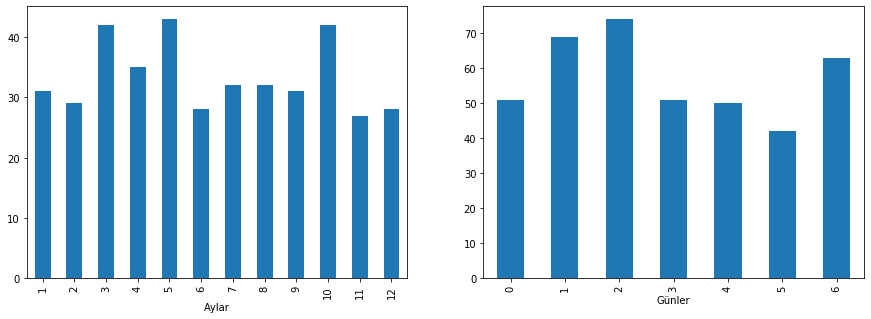

In [10]:
data['year'] = data.date_time.apply(lambda x: x.year)
data['month'] = data.date_time.apply(lambda x: x.month)
data['weekday'] = data.date_time.apply(lambda x: x.dayofweek)
dataover5 = data[data.richter >= 5]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)                                        # Aylara göre depremlerin yoğunluğu
dataover5.month.value_counts().sort_index().plot.bar()
plt.xlabel('Aylar')
plt.subplot(1,2,2)                                        # Günlere göre depremlerin yoğunluğu
dataover5.weekday.value_counts().sort_index().plot.bar()
plt.xlabel('Günler')

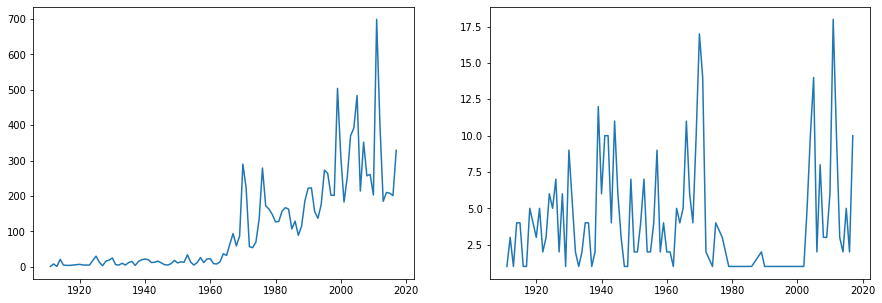

In [11]:
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)                                                # Tüm depremlerin yıllara göre dağılımı
plt.plot(data.year.value_counts().sort_index())
plt.subplot(1,2,2)                                                # 5 ten büyük depremlerin yıllara göre dağılımı
plt.plot(data[data.richter >= 5].year.value_counts().sort_index())

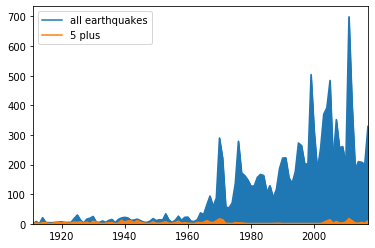

In [12]:
data.year.value_counts().sort_index(ascending=False).plot.area()  # 5 ten büyük depremlerin tüm depremlerle ilişkisi
data[data.richter >= 5].year.value_counts().sort_index(ascending=False).plot.area()
plt.legend(['all earthquakes', '5 plus'])

In [13]:
data = veri[veri['country'] == 'turkey']

In [14]:
data.drop(['id', 'date', 'time', 'country', 'city', 'area', 'direction', 'dist','mw','xm','ms'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
print("Türkiye dışındaki olan depremleri çıkardıktan sonra {} satır ve {} sütun bulunur".format(data.shape[0], data.shape[1]))

Türkiye dışındaki olan depremleri çıkardıktan sonra 11850 satır ve 6 sütun bulunur


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11850 entries, 0 to 24006
Data columns (total 6 columns):
lat        11850 non-null float64
long       11850 non-null float64
depth      11850 non-null float64
md         11850 non-null float64
richter    11850 non-null float64
mb         11850 non-null float64
dtypes: float64(6)
memory usage: 648.0 KB


#### 1) Tekrarlanan Verilerin Analizi ve Temizlenmesi

In [17]:
dups = data.duplicated()  # Tekrarlanan veri sayısını gösterir.
print(dups.sum())

58


In [18]:
data = data.drop_duplicates()  # Tekrarlanan 60 satırı siliyorum.

In [19]:
print("Eksik verileri çıkardıktan sonra {} satır ve {} sütun bulunur".format(data.shape[0], data.shape[1]))

Eksik verileri çıkardıktan sonra 11792 satır ve 6 sütun bulunur


In [20]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11792 entries, 0 to 24006
Data columns (total 6 columns):
lat        11792 non-null float64
long       11792 non-null float64
depth      11792 non-null float64
md         11792 non-null float64
richter    11792 non-null float64
mb         11792 non-null float64
dtypes: float64(6)
memory usage: 644.9 KB


In [21]:
data.describe() ## Elimizdeki veri setindeki NOT: lat long yorumlanabilir verilerdeki 0 değerler kaldırılmalı

,lat,long,depth,md,richter,mb
count,11792.000000,11792.000000,11792.000000,11792.000000,11792.000000,11792.000000
mean,38.748501,32.994104,12.777748,2.234812,1.760041,1.393038
std,1.312897,5.837154,16.128503,1.993109,2.067147,2.032011
min,35.770000,25.540000,0.000000,0.000000,0.000000,0.000000
25%,37.730000,28.160000,5.000000,0.000000,0.000000,0.000000
50%,38.780000,30.300000,8.400000,3.500000,0.000000,0.000000
75%,39.600000,38.610000,12.900000,3.800000,3.900000,3.700000
max,46.350000,45.000000,180.000000,7.400000,7.200000,7.100000


#### 2 ) Aykırı Verilerin Düzeltilmesi ve Temizlenmesi

In [22]:
data_depth = data["depth"]
data_richter = data["richter"]
data_long = data["long"]
data_lat = data["lat"]
data_md = data["md"]
data_mb = data["mb"]

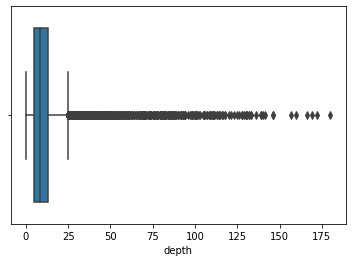

In [23]:
sns.boxplot(x = data_depth); ## Üst sınırdan itibaren aykırı veriler gözlenmektedir.

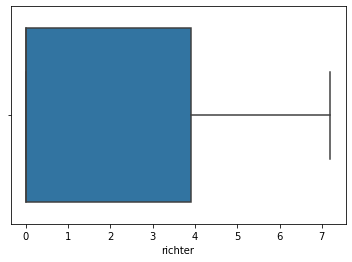

In [24]:
sns.boxplot(x = data_richter); ## Herhangi aykırı bir veri yok.

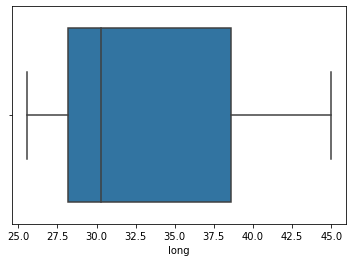

In [25]:
sns.boxplot(x = data_long); ## Herhangi aykırı bir veri yok.

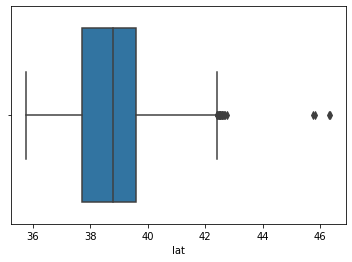

In [26]:
sns.boxplot(x = data_lat); ## Üst sınırdan itibaren aykırı veriler gözlenmektedir.

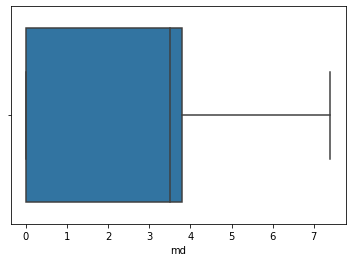

In [27]:
sns.boxplot(x = data_md); ## Herhangi aykırı bir veri yok.

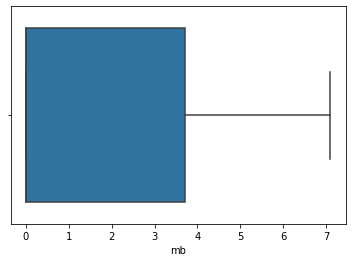

In [28]:
sns.boxplot(x = data_mb); ## Herhangi aykırı bir veri yok.

In [29]:
data.shape

(11792, 6)

In [30]:
Q1_depth = data_depth.quantile(0.25)
Q3_depth = data_depth.quantile(0.75)
IQR_depth = Q3_depth - Q1_depth

In [31]:
Q1_lat = data_lat.quantile(0.25)
Q3_lat = data_lat.quantile(0.75)
IQR_lat = Q3_lat - Q1_lat

In [32]:
Q1_long = data_long.quantile(0.25)
Q3_long = data_long.quantile(0.75)
IQR_long = Q3_long - Q1_long

In [33]:
Q1_richter = data_richter.quantile(0.25)
Q3_richter = data_richter.quantile(0.75)
IQR_richter = Q3_richter - Q1_richter

In [34]:
Q1_md = data_md.quantile(0.25)
Q3_md = data_md.quantile(0.75)
IQR_md = Q3_md - Q1_md

In [35]:
Q1_mb = data_mb.quantile(0.25)
Q3_mb = data_mb.quantile(0.75)
IQR_mb = Q3_mb - Q1_mb

In [36]:
alt_sinir_richter = Q1_richter - 1.5*IQR_richter
ust_sinir_richter = Q3_richter + 1.5*IQR_richter

In [37]:
alt_sinir_md = Q1_md - 1.5*IQR_md
ust_sinir_md = Q3_md + 1.5*IQR_md

In [38]:
alt_sinir_lat = Q1_lat - 1.5*IQR_lat
ust_sinir_lat = Q3_lat + 1.5*IQR_lat

In [39]:
alt_sinir_long = Q1_long - 1.5*IQR_long
ust_sinir_long = Q3_long + 1.5*IQR_long

In [40]:
alt_sinir_mb = Q1_mb - 1.5*IQR_mb
ust_sinir_mb = Q3_mb + 1.5*IQR_mb

In [41]:
alt_sinir_depth = Q1_depth - 1.5*IQR_depth
ust_sinir_depth = Q3_depth + 1.5*IQR_depth

In [42]:
print("Enlem Alt Sınırı: ", alt_sinir_lat, " Enlem Üst Sınırı: ", ust_sinir_lat)

print("Boylam Alt Sınırı: ", alt_sinir_long, " Boylam Üst Sınırı: ", ust_sinir_long)

print("Depth Alt Sınırı: ", alt_sinir_depth, " Depth Üst Sınırı: ", ust_sinir_depth)

print("Richter Büyüklüğü Alt Sınırı: ", alt_sinir_richter, " Richter Büyüklüğü Üst Sınırı: ", ust_sinir_richter)

print("Süreye Bağlı Büyüklük Alt Sınırı: ", alt_sinir_md, " Süreye Bağlı Büyüklük Üst Sınırı: ", ust_sinir_md)

print("Cisim Dalga Büyüklüğü Alt Sınırı: ", alt_sinir_mb, " Cisim Dalga Büyüklüğü Üst Sınırı: ", ust_sinir_mb)

Enlem Alt Sınırı:  34.92499999999999  Enlem Üst Sınırı:  42.40500000000001
Boylam Alt Sınırı:  12.485000000000001  Boylam Üst Sınırı:  54.285
Depth Alt Sınırı:  -6.850000000000001  Depth Üst Sınırı:  24.75
Richter Büyüklüğü Alt Sınırı:  -5.85  Richter Büyüklüğü Üst Sınırı:  9.75
Süreye Bağlı Büyüklük Alt Sınırı:  -5.699999999999999  Süreye Bağlı Büyüklük Üst Sınırı:  9.5
Cisim Dalga Büyüklüğü Alt Sınırı:  -5.550000000000001  Cisim Dalga Büyüklüğü Üst Sınırı:  9.25


In [43]:
new_data = data.drop(data.index[data['lat'] >= ust_sinir_lat]) # Ust sınır 42 den yuksek olan satırları kaldırdım.

In [44]:
new_data = new_data.drop(new_data.index[new_data['lat'] <= alt_sinir_lat]) # Alt sınır 36 dan kucuk olan satırları kaldırdım.

In [45]:
new_data = new_data.drop(new_data.index[new_data['long'] >= ust_sinir_long]) # Ust sınır 45 ten buyuk olan satırları kaldırdım.

In [46]:
new_data = new_data.drop(new_data.index[new_data['long'] <= alt_sinir_long]) # Alt sınır 26 dan kucuk olan satırları kaldırdım.

In [47]:
new_data = new_data.drop(new_data.index[new_data['richter'] == 0]) # Richter degeri 0 olan satırları kaldırdım.

In [48]:
new_data = new_data.drop(new_data.index[new_data['mb'] == 0]) # Mb degeri 0 olan satırları kaldırdım.

In [49]:
new_data = new_data.drop(new_data.index[new_data['md'] == 0]) # Md degeri 0 olan satırları kaldırdım.

In [50]:
new_data.describe()  # Yukarıda yaptığım işlemlerin doğruluğunu tespit etmek için min max değerlerine baktım.

,lat,long,depth,md,richter,mb
count,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000
mean,39.022025,32.717723,30.514106,4.719543,4.705753,4.742238
std,1.371771,5.271856,22.614715,0.489379,0.478239,0.451003
min,36.000000,25.740000,2.000000,3.500000,3.700000,3.900000
25%,37.920000,29.030000,10.000000,4.300000,4.400000,4.400000
50%,39.060000,30.190000,30.000000,4.700000,4.600000,4.700000
75%,40.060000,36.500000,40.000000,5.000000,4.900000,5.000000
max,42.300000,45.000000,180.000000,7.200000,7.200000,7.100000


In [51]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 20 to 19363
Data columns (total 6 columns):
lat        1269 non-null float64
long       1269 non-null float64
depth      1269 non-null float64
md         1269 non-null float64
richter    1269 non-null float64
mb         1269 non-null float64
dtypes: float64(6)
memory usage: 69.4 KB


In [52]:
print("Aykırı verileri düzenledikten sonra {} satır ve {} sütun bulunur".format(new_data.shape[0], new_data.shape[1]))

Aykırı verileri düzenledikten sonra 1269 satır ve 6 sütun bulunur


#### 3) Eksik verileri analizi ve temizlenmesi

In [53]:
new_data.isnull().sum() # Kullanacağım featurelar içinde eksik verinin bulunmadığını gözlemledim.

lat        0
long       0
depth      0
md         0
richter    0
mb         0
dtype: int64

In [54]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 20 to 19363
Data columns (total 6 columns):
lat        1269 non-null float64
long       1269 non-null float64
depth      1269 non-null float64
md         1269 non-null float64
richter    1269 non-null float64
mb         1269 non-null float64
dtypes: float64(6)
memory usage: 69.4 KB


In [55]:
print("Eksik verilere baktıktan sonra {} satır ve {} sütun bulunur".format(new_data.shape[0], new_data.shape[1]))

Eksik verilere baktıktan sonra 1269 satır ve 6 sütun bulunur


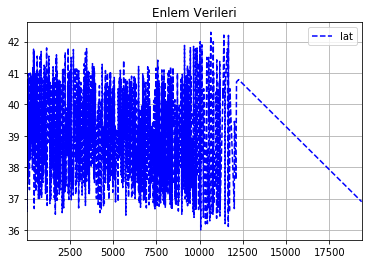

In [56]:
new_data.lat.plot(kind="line",grid=True,label="lat",linestyle="--",color="b")   # Türkiye 36-42 Enlemleri arasında 
plt.legend(loc="best")                                                          # yer alır.
plt.title("Enlem Verileri")
plt.show()

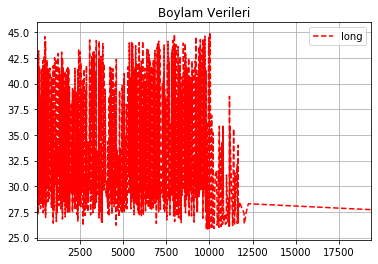

In [57]:
new_data.long.plot(kind="line",grid=True,label="long",linestyle="--",color="r")   # Türkiye 26-45 Boylamları arasında
plt.legend(loc="best")                                                            # yer alır.
plt.title("Boylam Verileri")
plt.show()

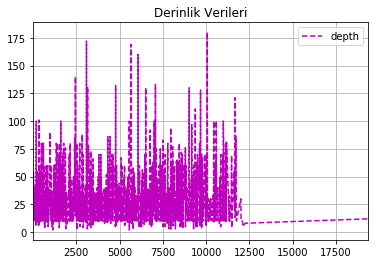

In [58]:
new_data.depth.plot(kind="line",grid=True,label="depth",linestyle="--",color="m")  
plt.legend(loc="best")                                                         
plt.title("Derinlik Verileri")
plt.show()

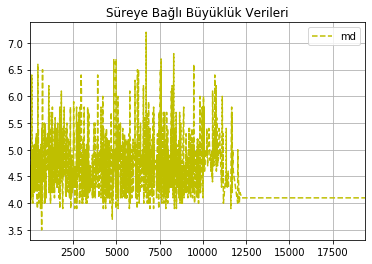

In [59]:
new_data.md.plot(kind="line",grid=True,label="md",linestyle="--",color="y")   
plt.legend(loc="best")                                                         
plt.title("Süreye Bağlı Büyüklük Verileri")
plt.show()

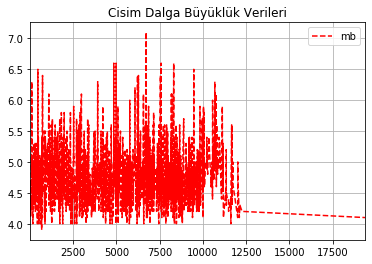

In [60]:
new_data.mb.plot(kind="line",grid=True,label="mb",linestyle="--",color="r")   
plt.legend(loc="best")                                                         
plt.title("Cisim Dalga Büyüklük Verileri")
plt.show()

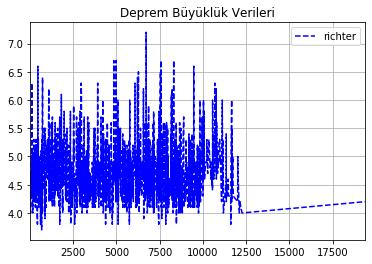

In [61]:
new_data.richter.plot(kind="line",grid=True,label="richter",linestyle="--",color="b")   
plt.legend(loc="best")                                                         
plt.title("Deprem Büyüklük Verileri")
plt.show()

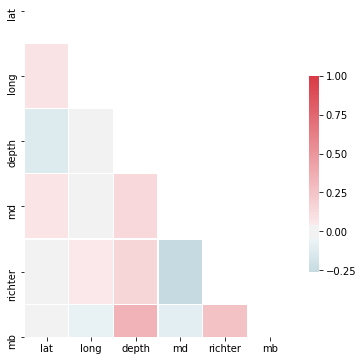

In [62]:
mask = np.triu(np.ones_like(data.corr(), dtype = np.bool))

plt.figure(figsize = (6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(data.corr(), mask = mask, cmap = cmap, center = 0,
             linewidths = .3, fmt= '.2f', cbar_kws = {"shrink": .6})



In [63]:
X=new_data.drop('richter',axis=1,inplace=False) # Tahmin edeceğim sütunu çıkarıyorum.

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 20 to 19363
Data columns (total 5 columns):
lat      1269 non-null float64
long     1269 non-null float64
depth    1269 non-null float64
md       1269 non-null float64
mb       1269 non-null float64
dtypes: float64(5)
memory usage: 59.5 KB


In [65]:
y=new_data['richter']

# Veri setinin 20/80 olarak test ve eğitim verileri olmak üzereye ikiye ayırdım.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(1015, 5)
(1015,)
(254, 5)
(1015,)


### MAKİNE ÖĞRENMESİ ALGORİTMALARI

#### 1) Linear Regresyon Algoritması

In [66]:
linear=LinearRegression() 

In [67]:
linear.fit(X_train,y_train) #Eğitim verileri

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
test_veri_skoru=linear.score(X_test,y_test)  # Test verilerinin skoru
print(test_veri_skoru)

0.9625110023155352


In [69]:
egitim_veri_skoru=linear.score(X_train,y_train) # Eğitim verilerinin skoru
print(egitim_veri_skoru)

0.9658558772211301


In [70]:
print('Test verilerinin skoru {} \nEgitim verilerinin skoru: {} '.format(test_veri_skoru, egitim_veri_skoru))

Test verilerinin skoru 0.9625110023155352 
Egitim verilerinin skoru: 0.9658558772211301 


In [71]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [-1.88876726e-03  6.87384890e-05 -3.99386144e-04  7.36983261e-01
  2.46076483e-01]
intercepts: 
 0.1450600697509472


In [72]:
y_pred = linear.predict(X_test)

In [73]:
df = pd.DataFrame({'Gerçek': y_test, 'Tahmin': y_pred})
df.head()

,Gerçek,Tahmin
10780,4.8,4.809359
6765,4.9,4.964686
3403,5.6,5.633949
12008,4.2,4.022526
8254,4.9,4.709358


In [74]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0630642704935793
Mean Squared Error: 0.008626775274867566
Root Mean Squared Error: 0.09288043537186702


In [75]:
linear_predict_data=np.array([[39.21,41.40,14.0,4.7,4.7]])   # richter değeri : 4.7
lineer_tekli_tahmin=linear.predict(linear_predict_data)
print(lineer_tekli_tahmin)

[4.68863667]


#### 2) KNN Model

In [76]:
knn_model = KNeighborsRegressor()

In [77]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [78]:
ilk_durum_tahmini = knn_model.predict(X_test)

In [79]:
np.sqrt(mean_squared_error(y_test,ilk_durum_tahmini))

0.371604310765534

In [80]:
from sklearn.model_selection import cross_val_score 

neighbors = []                                                              # komşu değerleri almak için boş liste
cv_scores = []                                                              # skorları almak için boş liste
  


for k in range(1, 51, 2):                                                   # K değerlerini bulurken 50 değer için
    neighbors.append(k) 
    knn_model = KNeighborsRegressor(n_neighbors = k)                             
    scores = cross_val_score( 
        knn_model, X_train, y_train, cv = 10) 
    cv_scores.append(scores.mean()) 
    
  
    
scores = cross_val_score(knn_model, X, y, cv=10)
print(scores)

[0.21709098 0.21105119 0.2400245  0.10998344 0.22138066 0.28605553
 0.18087134 0.18010252 0.18151456 0.08834664]


En iyi k değeri = 3 


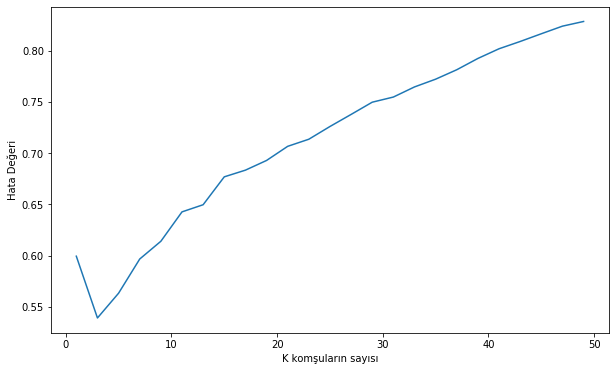

In [81]:
MSE = [1-x for x in cv_scores]                                               

# en iyi k değerinin hesaplanması
optimal_k = neighbors[MSE.index(min(MSE))]
print('En iyi k değeri = %d ' %optimal_k)

# Plot misclassification error versus k
plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('K komşuların sayısı')
plt.ylabel('Hata Değeri')
plt.show()

In [82]:
knn_tuned = KNeighborsRegressor(n_neighbors = optimal_k).fit(X_train,y_train)

In [83]:
knn_pred = knn_tuned.predict(X_test)

In [84]:
np.sqrt(mean_squared_error(y_test,knn_pred))

0.372125906500359

In [85]:
knn_df = pd.DataFrame({'Gerçek': y_test, 'Tahmin': knn_pred})
knn_df.head()

,Gerçek,Tahmin
10780,4.8,4.733333
6765,4.9,5.433333
3403,5.6,4.866667
12008,4.2,4.666667
8254,4.9,4.333333


In [86]:
knn_predict_data=np.array([[39.21,41.40,14.0,4.7,4.7]])   # richter değeri : 4.7
knn_tekli_tahmin=knn_tuned.predict(knn_predict_data)
print(knn_tekli_tahmin)

[4.8]


In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))

Mean Absolute Error: 0.26850393700787406
Mean Squared Error: 0.13847769028871393
Root Mean Squared Error: 0.372125906500359


#### 3) Decision Tree Algoritması 

In [88]:
decision_tree_model = DecisionTreeRegressor().fit(X_train,y_train)

In [89]:
y_pred_decision_tree = decision_tree_model.predict(X_test)

In [90]:
np.sqrt(mean_squared_error(y_test,y_pred_decision_tree))

0.1106530365068622

In [91]:
decision_tree_model = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train) # Derinliği 3 olarak ayarlarsak değişime bakalım.
y_pred_decision_tree = decision_tree_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_decision_tree))

0.11841394169595966

In [92]:
decision_tree_params = {"max_depth":[1,2,3,4,5,10,20],"min_samples_split":[2,10,5,30,50,100]}

In [93]:
decision_tree_cv_model = GridSearchCV(decision_tree_model,decision_tree_params,cv=10).fit(X_train,y_train)

In [94]:
decision_tree_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [95]:
decision_tree_tuned = DecisionTreeRegressor(max_depth=5,min_samples_split=10).fit(X_train,y_train)

In [96]:
y_pred_decision_tree = decision_tree_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_decision_tree))

0.0908254872798859

In [97]:
from sklearn import tree

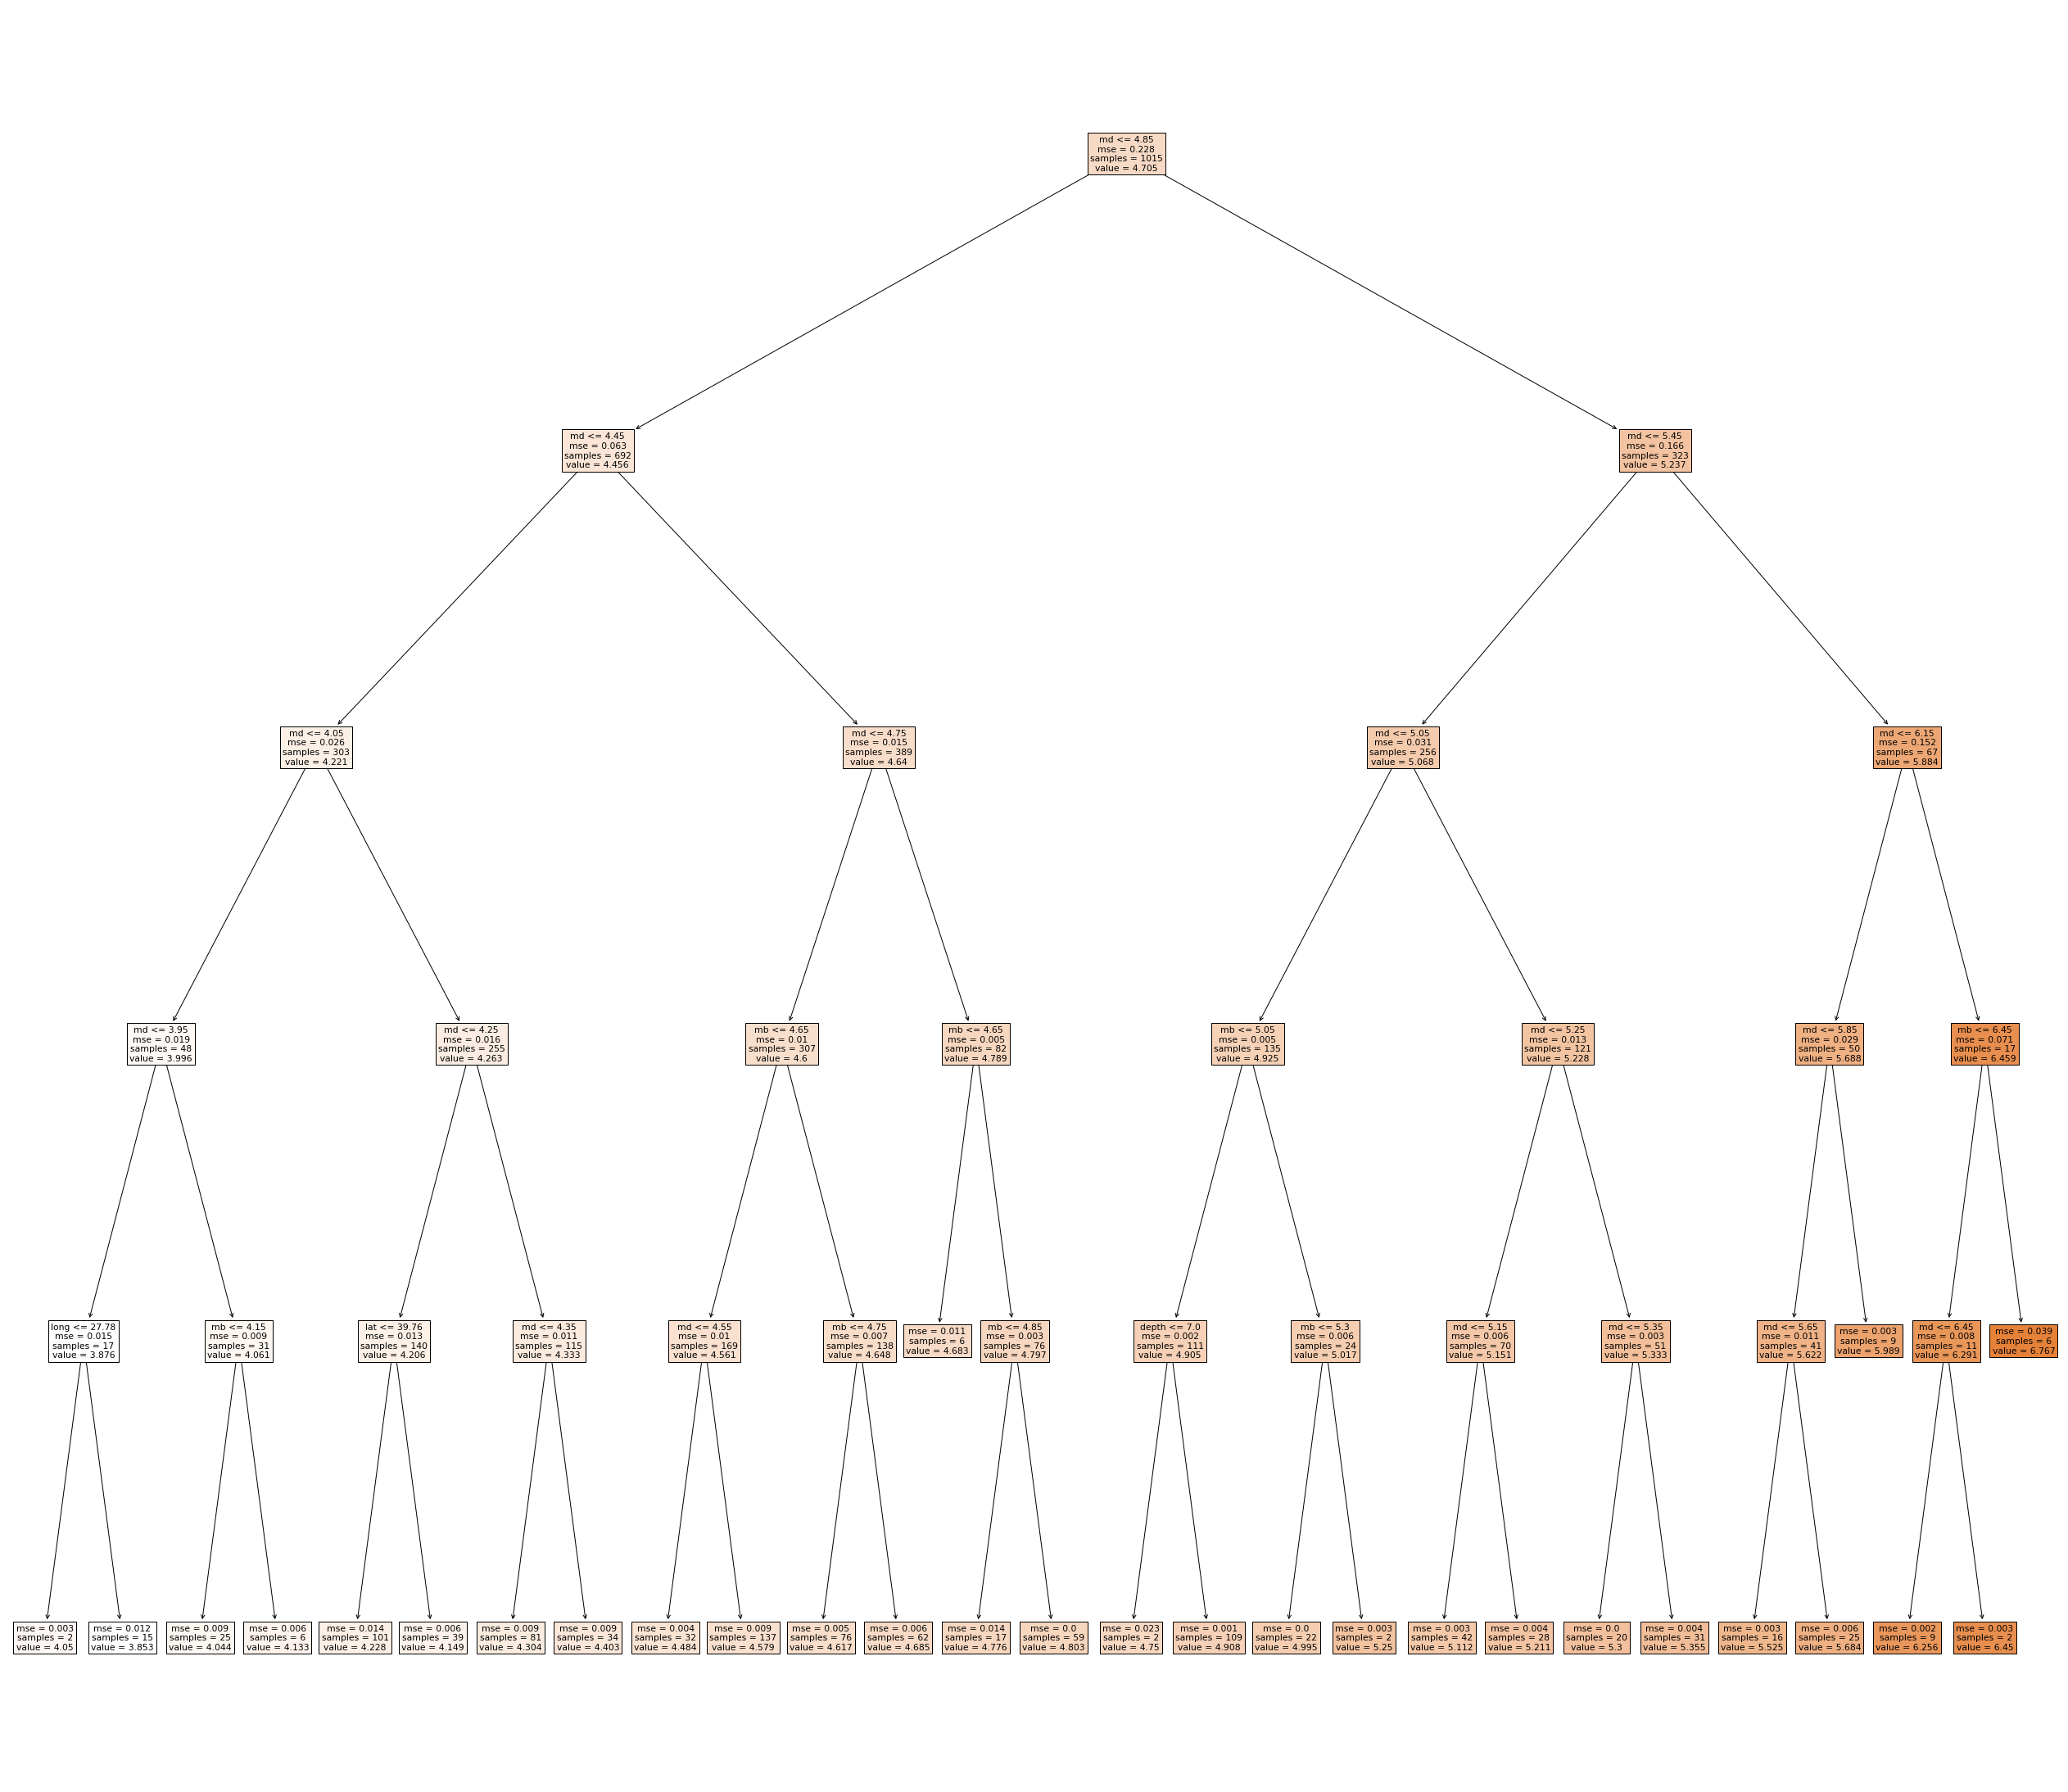

In [98]:
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(decision_tree_tuned, feature_names=X.columns, filled=True)

In [121]:
decision_tree_df = pd.DataFrame({'Gerçek': y_test, 'Tahmin': y_pred_decision_tree})
decision_tree_df.head()

,Gerçek,Tahmin
10780,4.8,4.803390
6765,4.9,4.908257
3403,5.6,5.684000
12008,4.2,4.044000
8254,4.9,4.685484


In [122]:
decision_tree_predict_data=np.array([[39.21,41.40,14.0,4.7,4.7]])   # richter değeri : 4.7
decision_tree_tekli_tahmin=decision_tree_tuned.predict(decision_tree_predict_data)
print(decision_tree_tekli_tahmin) 

[4.61710526]


In [123]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_decision_tree))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_decision_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_decision_tree)))

Mean Absolute Error: 0.05474026293144292
Mean Squared Error: 0.008249269139628703
Root Mean Squared Error: 0.09082548727988583


#### 4) Random Forest Algoritması

In [124]:
random_forest_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [125]:
random_forest_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [126]:
random_forest_predict = random_forest_model.predict(X_test)

In [127]:
np.sqrt(mean_squared_error(y_test,random_forest_predict))

0.0964528361755071

In [128]:
random_forest_params = {"max_depth": [3,5],
            "max_features": [2,5],
            "n_estimators":[300,500],
            "min_samples_split":[2,10,80]}

In [129]:
random_forest_cv_model = GridSearchCV(random_forest_model,random_forest_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   31.4s finished


In [130]:
random_forest_cv_model.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [131]:
random_forest_model = RandomForestRegressor(random_state=42,
                                max_depth=5,
                                max_features=5,
                                min_samples_split=2,
                                n_estimators=300)
random_forest_tuned=random_forest_model.fit(X_train,y_train)

In [132]:
random_forest_predict = random_forest_tuned.predict(X_test)

In [133]:
np.sqrt(mean_squared_error(y_test,random_forest_predict))

0.08685263294752422

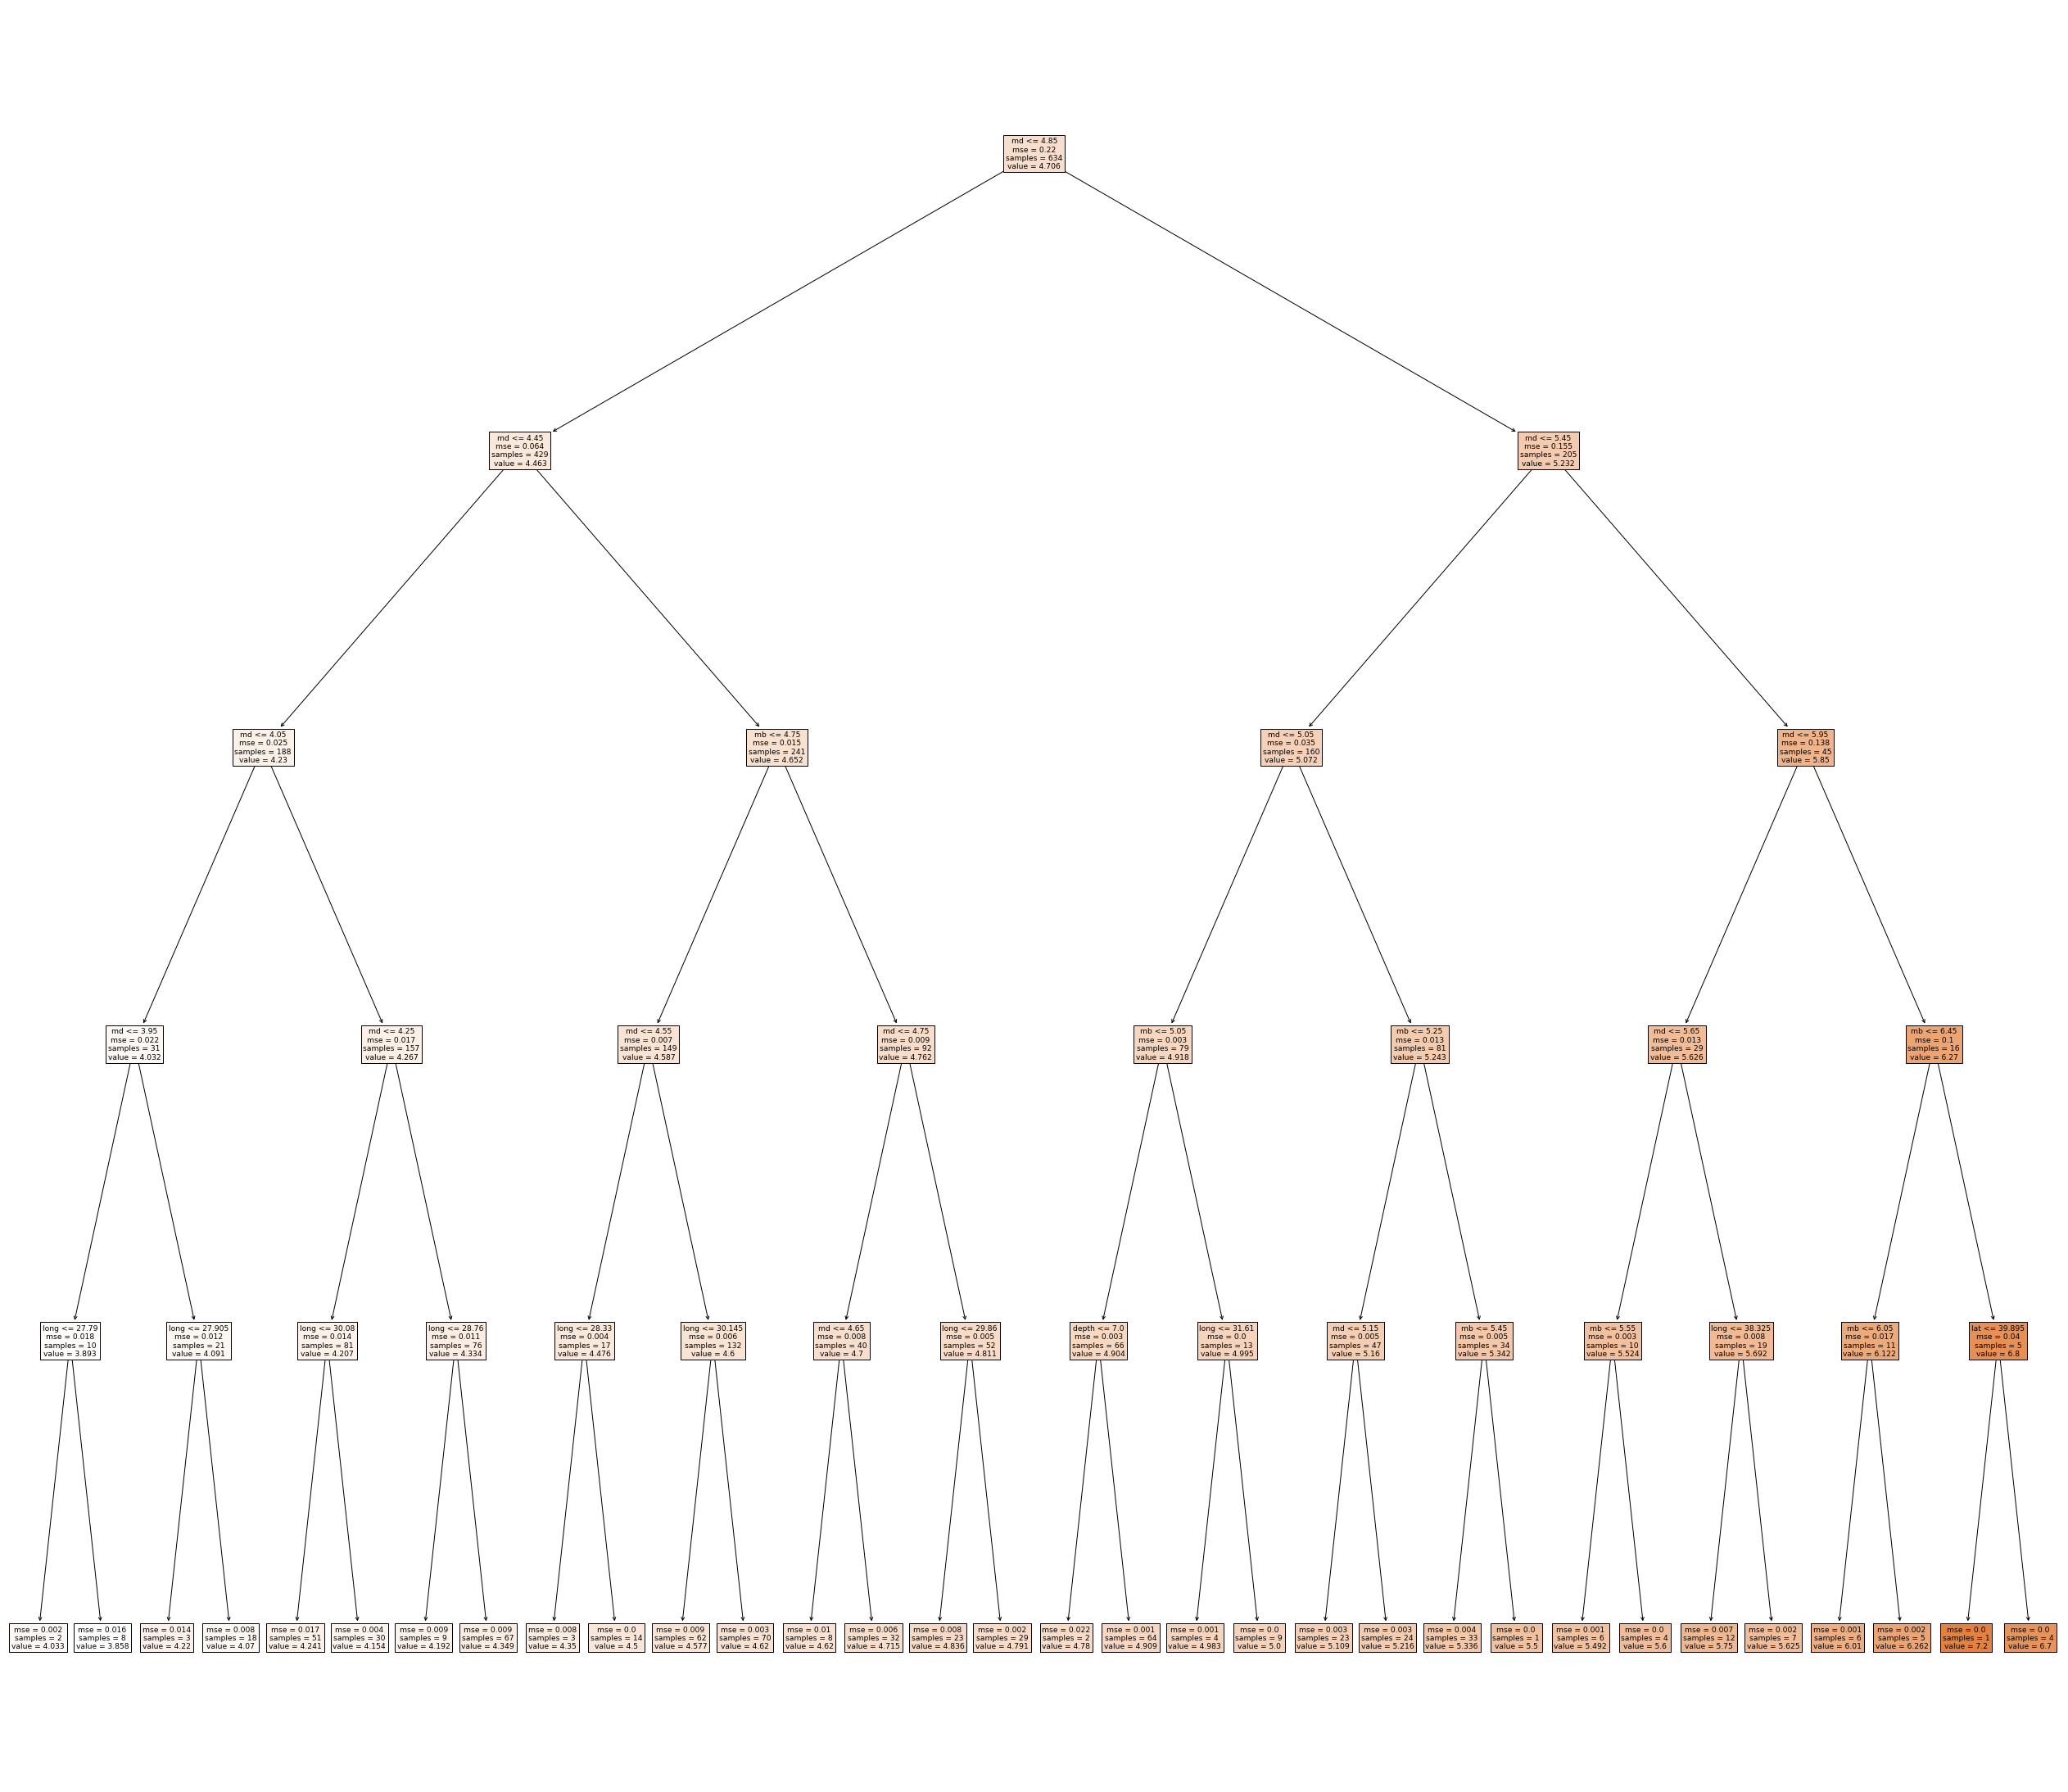

In [134]:
plt.figure(figsize=(45,40))
_ = tree.plot_tree(random_forest_tuned.estimators_[0], feature_names=X.columns, filled=True)  
# Örnek olması için sadece ilk ağacı inceledim

In [135]:
random_forest_df = pd.DataFrame({'Gerçek': y_test, 'Tahmin': random_forest_predict})
random_forest_df.head()

,Gerçek,Tahmin
10780,4.8,4.802311
6765,4.9,4.909315
3403,5.6,5.635923
12008,4.2,4.095223
8254,4.9,4.681335


In [136]:
random_forest_predict_data=np.array([[39.21,41.40,14.0,4.7,4.7]])   # richter değeri : 4.7
random_forest_tekli_tahmin=random_forest_tuned.predict(random_forest_predict_data)
print(random_forest_tekli_tahmin)

[4.61562534]


In [137]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, random_forest_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, random_forest_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, random_forest_predict)))

Mean Absolute Error: 0.052274763523201095
Mean Squared Error: 0.007543379849917369
Root Mean Squared Error: 0.08685263294752422


#### Modellerin Hatalar ve Tekil Örnek Bazında Algoritmaların Karşılaştırılması

In [138]:
print('\n')

print('Random Forest Mean Absolute Error:', metrics.mean_absolute_error(y_test, random_forest_predict))
print('Decision Tree Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_decision_tree))
print('Lineer Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('KNN Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_pred))

print('\n')

print('En az hatadan en çok hataya doğru: Random Forest < Decision Tree < Lineer < KNN')

print('\n')

print('Random Forest Mean Squared Error:', metrics.mean_squared_error(y_test, random_forest_predict))
print('Lineer Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Decision Tree Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_decision_tree))
print('KNN Mean Squared Error:', metrics.mean_squared_error(y_test, knn_pred))

print('\n')

print('En az hatadan en çok hataya doğru: Random Forest < Lineer < Decision Tree < KNN')

print('\n')

print('Random Forest Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, random_forest_predict)))
print('Lineer Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Decision Tree Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_decision_tree)))
print('KNN Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))

print('\n')

print('En az hatadan en çok hataya doğru: Random Forest < Lineer < Decision Tree < KNN')

print('\n')



Random Forest Mean Absolute Error: 0.052274763523201095
Decision Tree Mean Absolute Error: 0.05474026293144292
Lineer Mean Absolute Error: 0.0630642704935793
KNN Mean Absolute Error: 0.26850393700787406


En az hatadan en çok hataya doğru: Random Forest < Decision Tree < Lineer < KNN


Random Forest Mean Squared Error: 0.007543379849917369
Lineer Mean Squared Error: 0.008626775274867566
Decision Tree Mean Squared Error: 0.008249269139628703
KNN Mean Squared Error: 0.13847769028871393


En az hatadan en çok hataya doğru: Random Forest < Lineer < Decision Tree < KNN


Random Forest Root Mean Squared Error: 0.08685263294752422
Lineer Root Mean Squared Error: 0.09288043537186702
Decision Tree Root Mean Squared Error: 0.09082548727988583
KNN Root Mean Squared Error: 0.372125906500359


En az hatadan en çok hataya doğru: Random Forest < Lineer < Decision Tree < KNN




In [139]:
# [39.21,41.40,14.0,4.7,4.7] değerine göre en iyi tahminler.
print('\n')

print('Lineer tahmin: ' , lineer_tekli_tahmin)
print('Decision Tree tahmin: ' , decision_tree_tekli_tahmin)
print('Random Forest tahmin: ' , random_forest_tekli_tahmin)
print('KNN tahmin: ' , knn_tekli_tahmin)

print('\n')

print('En iyi tahmin edenden düşük tahmine doğru sıralaması: Lineer > Decision Tree > Random Forest > KNN')



Lineer tahmin:  [4.68863667]
Decision Tree tahmin:  [4.61710526]
Random Forest tahmin:  [4.61562534]
KNN tahmin:  [4.8]


En iyi tahmin edenden düşük tahmine doğru sıralaması: Lineer > Decision Tree > Random Forest > KNN


### PROJE SONU